In [3]:
import os
import tushare as ts
print (ts.__version__)
ts.set_token('87b769832ea19e30b1f76de81c85a22c9bf5e88b7bf15678c2bb2e07')
pro = ts.pro_api()
df = pro.stock_basic(ts_code='603893.SH')


1.2.62


In [1]:
305+19+116+7


447

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fnwp="/mnt/data_disk2/n_workspace/AT/p1/s1/e2020F_1/AT_AccountDetail.csv"

df=pd.read_csv(fnwp)
df

,DateI,Cash_after_closing,MarketValue_after_closing
0,20200102,1.000000e+06,0.000000
1,20200103,9.041002e+05,95899.761300
2,20200106,9.048083e+05,94913.465500
3,20200107,3.174839e+05,683794.736898
4,20200108,8.568026e+05,142915.521798
...,...,...,...
92,20200525,1.257608e+06,150035.997300
93,20200526,8.271578e+05,580534.678171
94,20200527,7.418413e+05,691020.884092
95,20200528,1.137544e+06,289758.901600


No handles with labels found to put in legend.


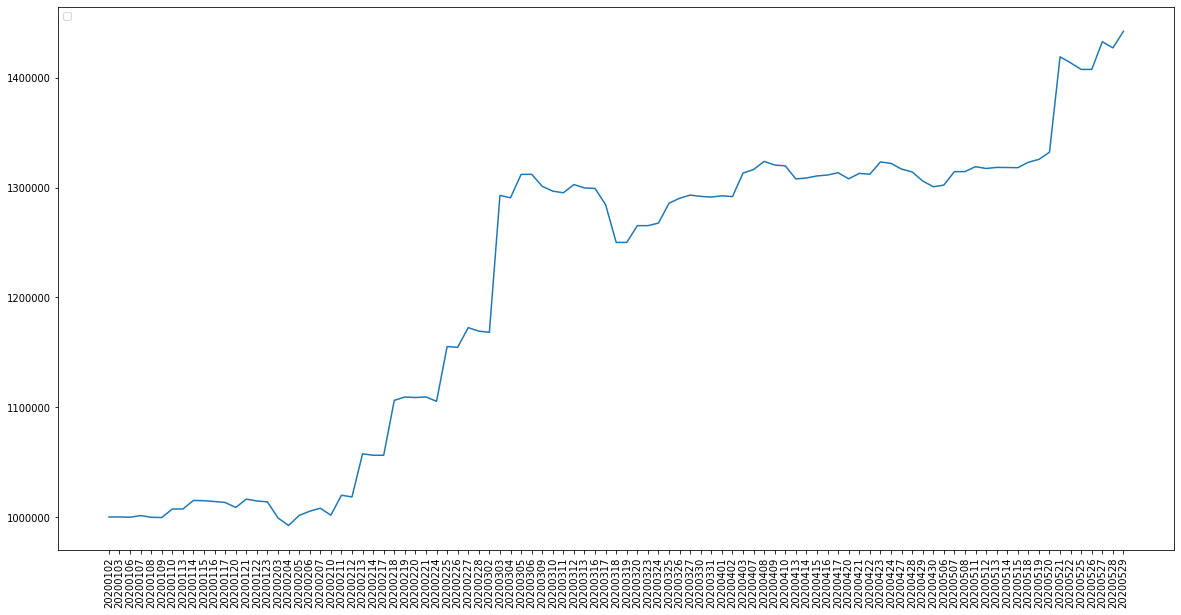

In [9]:

df["total"]=df["Cash_after_closing"]+df["MarketValue_after_closing"]
plt.rcParams["figure.figsize"] = (20, 10)
#plt.plot(df["total"])

fig = plt.figure()
fig.add_subplot(111)
allaxes = fig.get_axes()
allaxes[0].plot(df["total"])
#allaxes[0].set_title("Trans Count Statics {0} group {1}".format(system_name, Eval_Group_idx))
allaxes[0].set_xticks(list(range(len(df))))
allaxes[0].set_xticklabels([str(dayI) for dayI in df["DateI"].tolist()],rotation=90)
#allaxes[1].set_title("Trans Count (Plus Minus Zero) {0} group {1}".format(system_name, Eval_Group_idx))
allaxes[0].legend(loc='upper left')


In [4]:
a=list(range(10))
import random
random.shuffle(a)

In [11]:
b=list(range(10))
import pickle
pickle.dump([b,[1,2,3],1.0],open("/home/rdchujf/a.pickle", "wb"))

In [14]:
dateI, num_stock_could_invest, l_a_OB, l_a_OS, l_holding=pickle.load(open("/home/rdchujf/20200106.pickle", "rb"))


In [18]:
Sidxs_all = set(list(range(len(l_a_OB))))
Sidxs_OB_buy = set([idx for idx, action in enumerate(l_a_OB) if action == 0])
Sidxs_holding = set([idx for idx, holding_flag in enumerate(l_holding) if holding_flag])
Sidxs_OS_sell = set([idx for idx, action in enumerate(l_a_OS) if action == 2])


In [24]:
Sidxs_sell = (Sidxs_OS_sell - Sidxs_OB_buy) & Sidxs_holding
Sidxs_sell

{216}

In [32]:
Sidxs_buy = Sidxs_OB_buy - Sidxs_holding
print (len(Sidxs_buy),len(Sidxs_OB_buy))
assert len(Sidxs_sell & Sidxs_buy)==0, "{0} {1}".format(Sidxs_sell , Sidxs_buy)
Sidxs_not_buy_due_limit = set()
if len(Sidxs_buy) > num_stock_could_invest:
    lidxs_0 = list(Sidxs_buy)
    random.shuffle(lidxs_0)
    Sidxs_buy = set(lidxs_0[:num_stock_could_invest])
    Sidxs_not_buy_due_limit = set(lidxs_0[num_stock_could_invest:])
print (len(Sidxs_buy), len(Sidxs_not_buy_due_limit))
assert len(Sidxs_buy & Sidxs_sell) == 0, "Sidxs_buy {0} & Sidxs_sell {1}".format(Sidxs_buy, Sidxs_sell)
Sidxs_no_action_1 = Sidxs_all - Sidxs_holding - Sidxs_buy
Sidxs_no_action_3 = Sidxs_holding - Sidxs_sell
assert len(Sidxs_buy) + len(Sidxs_no_action_1) + len(Sidxs_sell) + len(Sidxs_no_action_3) == len(Sidxs_all)

l_a = [0 for _ in range(len(l_a_OB))]
for action, s_idx in enumerate([Sidxs_buy, Sidxs_no_action_1, Sidxs_sell, Sidxs_no_action_3]):
    for idx in list(s_idx):
        l_a[idx] = action


24 25
18 6


In [37]:
l_a.count(3)

1

In [60]:
fnwp="/home/rdchujf/n_workspace/AT/p1/s2/e1/202012/20201228/AT_StepResult.csv"
dfar=pd.read_csv(fnwp)
dfar[dfar["Stock"]=="SZ000813"]

,Stock,Action,Action_Result,Buy_Gu,Buy_NPrice,Buy_Invest,Sell_Gu,Sell_NPrice,Sell_Return
18,SZ000813,Buy,Success,10200,4.86,49586.8716,0,0.0,0.0


In [61]:
fnwp="/home/rdchujf/n_workspace/AT/p1/s2/e1/202012/20201229/AT_StepResult.csv"
dfar=pd.read_csv(fnwp)
dfar[dfar["Stock"]=="SZ000813"]

,Stock,Action,Action_Result,Buy_Gu,Buy_NPrice,Buy_Invest,Sell_Gu,Sell_NPrice,Sell_Return
17,SZ000813,Sell,Success,0,0.0,0.0,5100,4.16,21188.4192
18,SZ000813,Sell,Success,0,0.0,0.0,5100,4.08,20780.9496


In [43]:
21188.4192+20780.9496

41969.3688

In [63]:
from DBR_Reader import RawData,Raw_HFQ_Index
i=RawData()
flag,dfqz28,mess=i.get_qz_df_inteface("SZ000813",20201228)
flag,dfqz29,mess=i.get_qz_df_inteface("SZ000813",20201229)
j=Raw_HFQ_Index("HFQ")
flag,dfj,mess=j.get_lumpsum_df("SZ000813")

In [64]:
dfj["open_price"]=dfj["open_price"]/dfj["coefficient_fq"]
dfj["highest_price"]=dfj["highest_price"]/dfj["coefficient_fq"]
dfj["lowest_price"]=dfj["lowest_price"]/dfj["coefficient_fq"]
dfj["close_price"]=dfj["close_price"]/dfj["coefficient_fq"]
a=dfj[(dfj["date"]>="20201228")&(dfj["date"]<"20201230")]
a

,code,date,open_price,highest_price,lowest_price,close_price,amount_gu,amount_yuan,exchange_ratio_for_tradable_part,exchange_ratio_for_whole,coefficient_fq
4983,SZ000813,20201228,4.870053,4.950051,4.370040,4.370040,54981800,243435712.0,0.024768,0.024529,4.0301
4984,SZ000813,20201229,3.960051,4.370040,3.960051,4.050048,132735736,544458496.0,0.059794,0.059218,4.0301


In [66]:
dfqz29[(dfqz29["Time"]>=93000)&(dfqz29["Time"]<93500)]["Price"].describe()

count    2935.000000
mean        4.129506
std         0.078496
min         3.960000
25%         4.080000
50%         4.100000
75%         4.150000
max         4.370000
Name: Price, dtype: float64

In [65]:
dfqz28[(dfqz28["Time"]>=93000)&(dfqz28["Time"]<93500)]["Price"].describe()

count    1668.000000
mean        4.711055
std         0.098372
min         4.550000
25%         4.610000
50%         4.720000
75%         4.790000
max         4.950000
Name: Price, dtype: float64

In [67]:
import tushare as ts
print (ts.__version__)
ts.set_token('87b769832ea19e30b1f76de81c85a22c9bf5e88b7bf15678c2bb2e07')
pro = ts.pro_api()

dfhfqr = pro.adj_factor(ts_code='000813.SZ', trade_date='')
print(dfhfqr[(dfhfqr["trade_date"]>=str(20201228))&(dfhfqr["trade_date"]<=str(20201230))])



1.2.62
      ts_code trade_date  adj_factor
48  000813.SZ   20201230       3.775
49  000813.SZ   20201229       3.775
50  000813.SZ   20201228       3.775


In [68]:
dfhfq = ts.pro_bar(ts_code='000813.SZ', adj='hfq', start_date='20201228', end_date='20201230')
dfhfq["open"]=dfhfq["open"]/3.775
dfhfq["high"]=dfhfq["high"]/3.775
dfhfq["low"]=dfhfq["low"]/3.775
dfhfq["close"]=dfhfq["close"]/3.775
print (dfhfq) 

     ts_code trade_date      open      high       low     close  pre_close  \
0  000813.SZ   20201230  4.000000  4.100000  3.800000  4.030013    15.2887   
1  000813.SZ   20201229  3.960000  4.369987  3.960000  4.049987    16.4967   
2  000813.SZ   20201228  4.870013  4.950013  4.369987  4.369987    18.3465   

   change  pct_chg         vol      amount  
0 -0.0754  -0.4932   856780.94  336559.529  
1 -1.2080  -7.3227  1327357.36  544458.503  
2 -1.8498 -10.0826   549818.00  243435.719  


In [1]:
import pickle
fnwp="/home/rdchujf/1.pickle"
a=pickle.load(open(fnwp,"rb"))

In [2]:
n_s_lv, n_s_sv, n_s_av, n_a, n_r, n_s__lv, n_s__sv, n_s__av, done_flag, l_support_view=a

In [11]:
for idx, [support,r] in enumerate(zip(l_support_view,n_r)):
    print (support,r)
    if idx >=150:
        break

[[{'Stock': 'SZ002440', 'DateI': 20191030, 'action_taken': 'Buy', 'action_return_message': 'Success', 'old_ap': 0.4974098, '_support_view_dic': {'Stock': 'SZ002440', 'DateI': 20191030, 'action_taken': 'Buy', 'action_return_message': 'Success', 'old_ap': 0.4974098}, 'SdisS_': 1}]] [0.15192097]
[[{'Stock': 'SZ002075', 'DateI': 20191021, 'action_taken': 'Buy', 'action_return_message': 'Success', 'old_ap': 0.4979528, '_support_view_dic': {'Stock': 'SZ002075', 'DateI': 20191021, 'action_taken': 'Buy', 'action_return_message': 'Success', 'old_ap': 0.4979528}, 'SdisS_': 1}]] [0.31886217]
[[{'Stock': 'SZ000718', 'DateI': 20180212, 'action_taken': 'Buy', 'action_return_message': 'Success', 'old_ap': 0.49715164, '_support_view_dic': {'Stock': 'SZ000718', 'DateI': 20180212, 'action_taken': 'Buy', 'action_return_message': 'Success', 'old_ap': 0.49715164}, 'SdisS_': 1}]] [0.15512947]
[[{'Stock': 'SH600388', 'DateI': 20180315, 'action_taken': 'Buy', 'action_return_message': 'Success', 'old_ap': 0.49

In [14]:
a=list(range(10))
del a[:-1]
a

[9]

In [1]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

